#Project Overview

Goals: Predict the median house price in a block (smallest census group in US) given other demographic and geographic information.

Dataset Used: California Census Data with Median Housing Price

Approach: Perform EDA, feature engineering, choose a suitable model for baseline, calculate metrics and try for complex models for improvement in metrics.

#Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/housing.csv')

#Exploratory Data Analysis

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We have both numerical and categorical features

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We have null values in the dataframe, hence we will require imputation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7801dc7b80>,
      dtype=object)

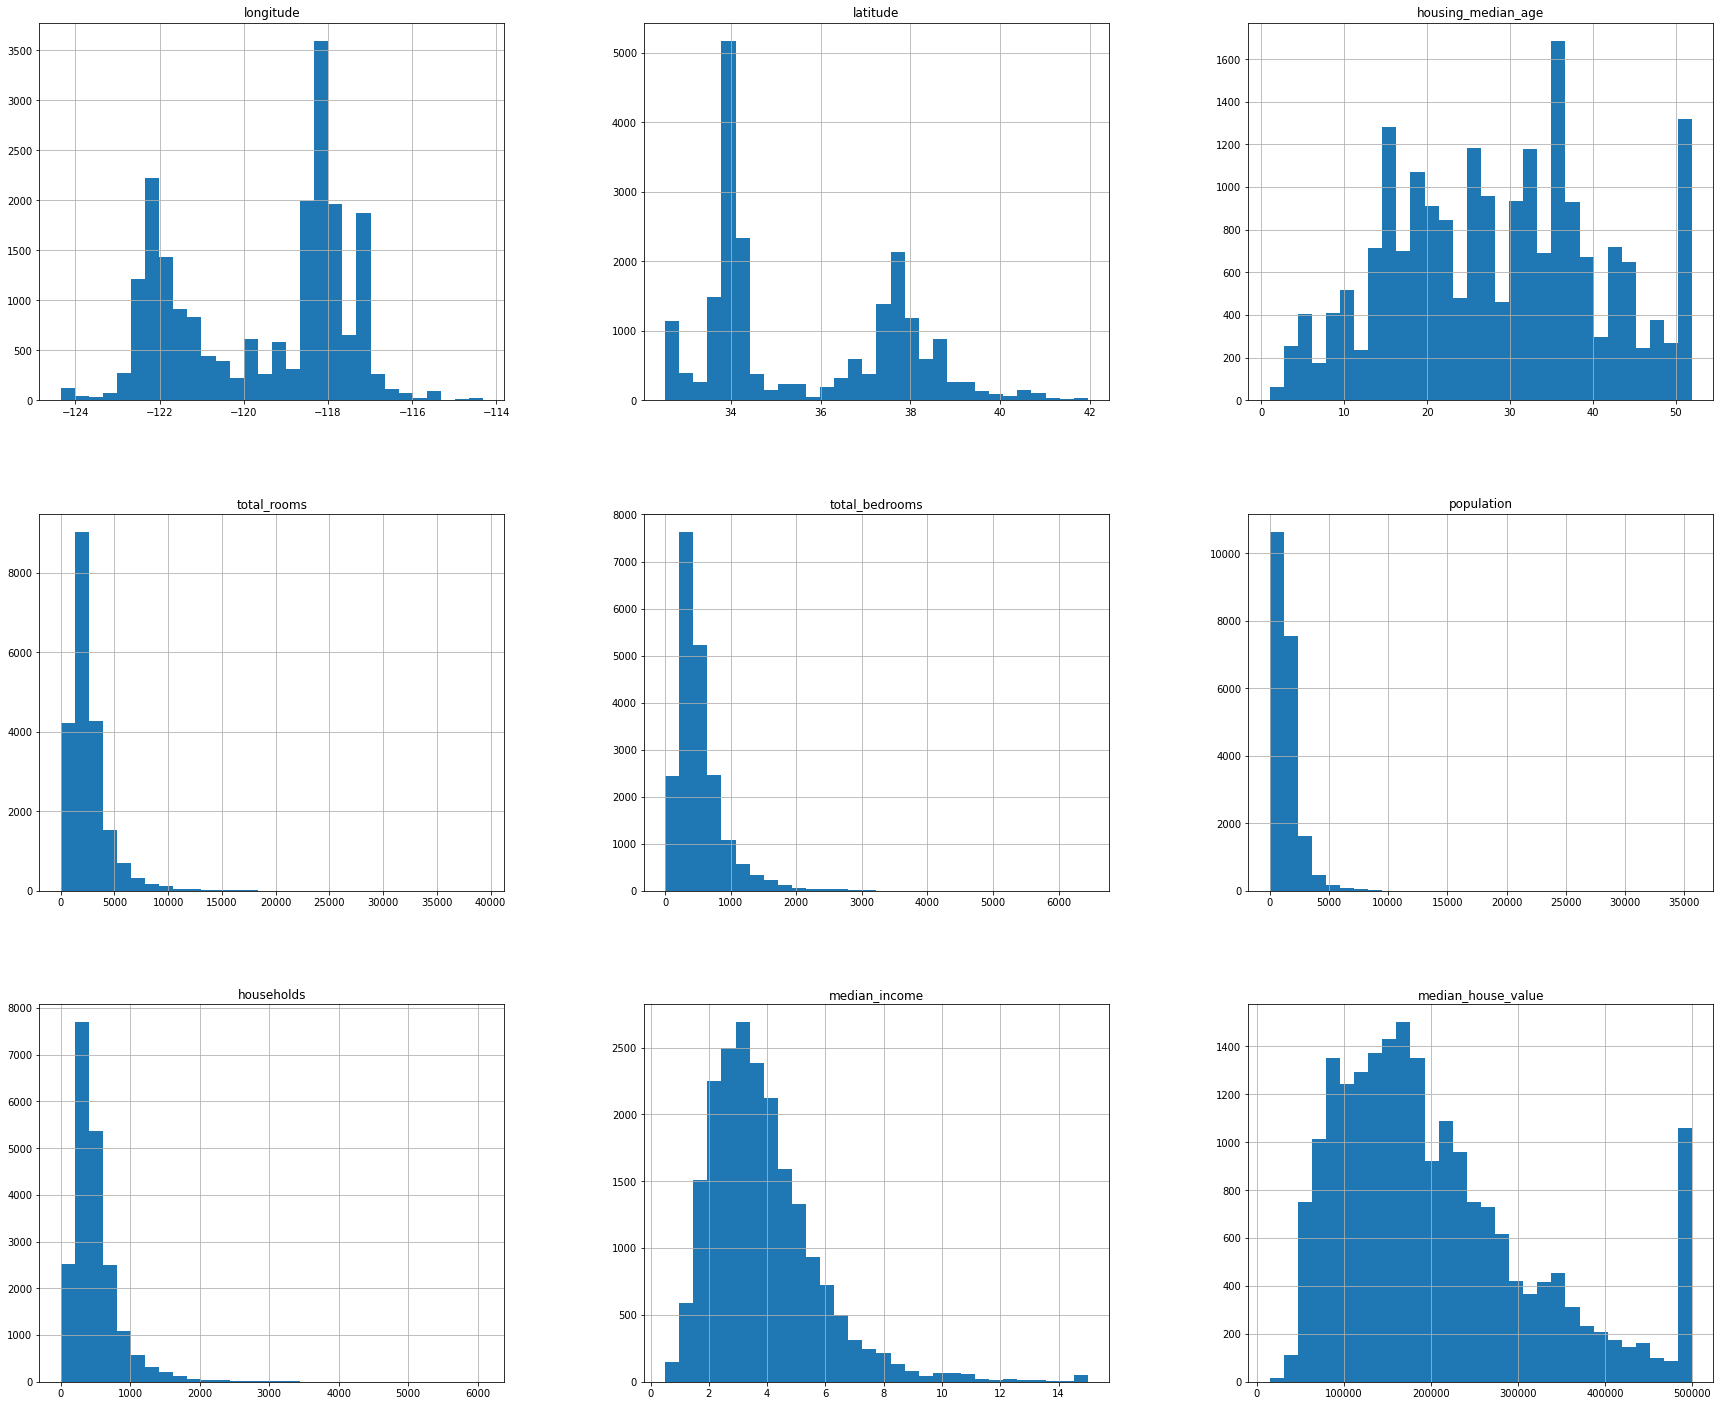

In [ ]:
df.hist(bins=30,figsize=(30,25))

We can infer from the histograms that:

*   Median House Value is clipped at 500000, this may lead to poor predictions as the data is misrepresentative.
*   Median Income has some arbitrary scale factor.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


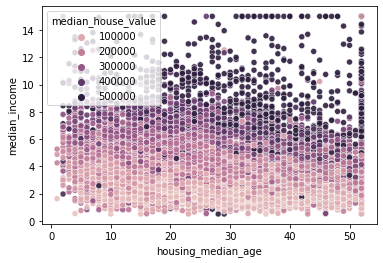

In [ ]:
sns.scatterplot(df['housing_median_age'],df['median_income'],hue=df['median_house_value'],alpha=0.9)

We can see that the median house value has a positive relationship with the median income from the trend in the graph

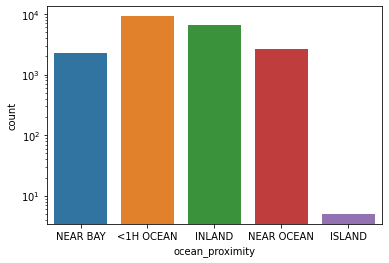

In [ ]:
sns.countplot(x=df["ocean_proximity"])
plt.yscale('log')

We have exponentially lesser number of datapoints where ocean_proximity = 'ISLAND'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


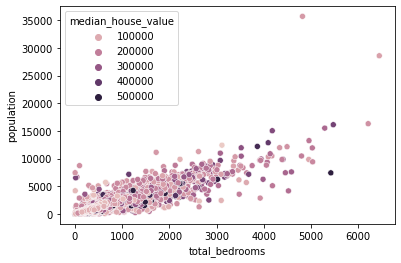

In [ ]:
sns.scatterplot(df['total_bedrooms'],df['population'],hue=df['median_house_value'])

Total bedrooms and population have a strong positive correlation.

Text(0.5, 1.0, 'Correlation Matrix')

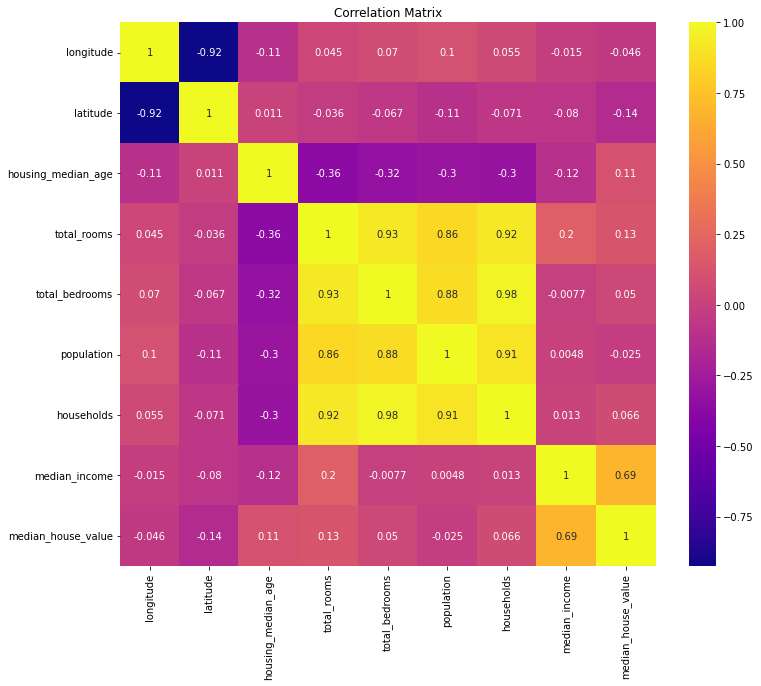

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,cmap='plasma')
plt.title("Correlation Matrix")

High correlation pairs:

*   Median House value & median_income
*   Latitude & Longitude(No significance, sheerly due to geographic location of areas)
*   Total rooms & Households
*   Total bedrooms & Households

*   Population & Total rooms
*   Population & Total bedrooms

Text(0.5, 1.0, 'Geographic plot representing house value trends')

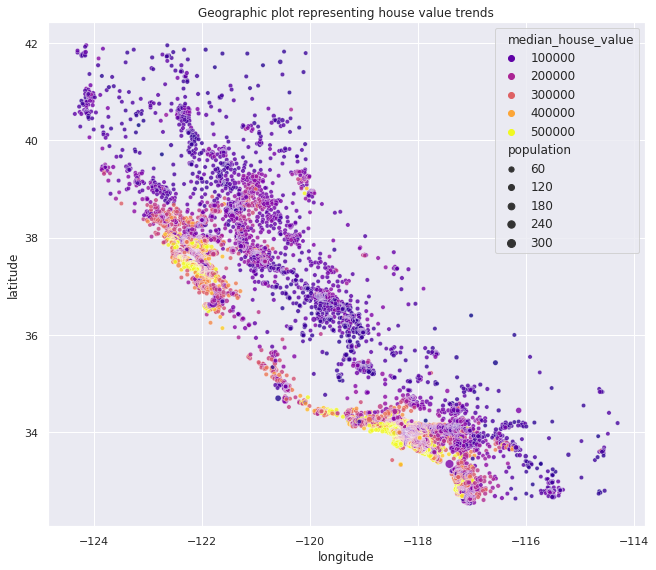

In [ ]:
sns.set(rc={'figure.figsize':(10.7,9.27)})
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['median_house_value'],size=df['population']/100,alpha=0.8,palette='plasma')
plt.title('Geographic plot representing house value trends')

This plot shows that houses near the coast are generally more expensive

#Summary of EDA


*   The dataset contains both numerical and categorical features

*   There are missing values in the dataset

*   Median House Value is clipped at 500000 and has many datapoints corresponding to 500000 USD
*   The dataset is imbalanced with respect to ocean proximity


*   Median income has a significantly high correlation with our target

*   We will use ElasticNet regression with GridSearchCV for baseline and self-implemented Gradient Boosted Decision Trees for improvement





#Feature Engineering

Let's try to manually construct features which seem to be helpful in predicting the value of a house

In [ ]:
df_original = df.copy();

df['Population_per_household'] = df['population']/df['households']
df['Population_per_bedroom'] = df['population']/df['total_bedrooms']
df['Rooms_per_household'] = df['total_rooms']/df['households']
df['Bedrooms_per_household'] = df['total_bedrooms']/df['households']
df['Rooms_per_bedrooms'] = df['total_rooms']/df['total_bedrooms']

Text(0.5, 1.0, 'Correlation Matrix')

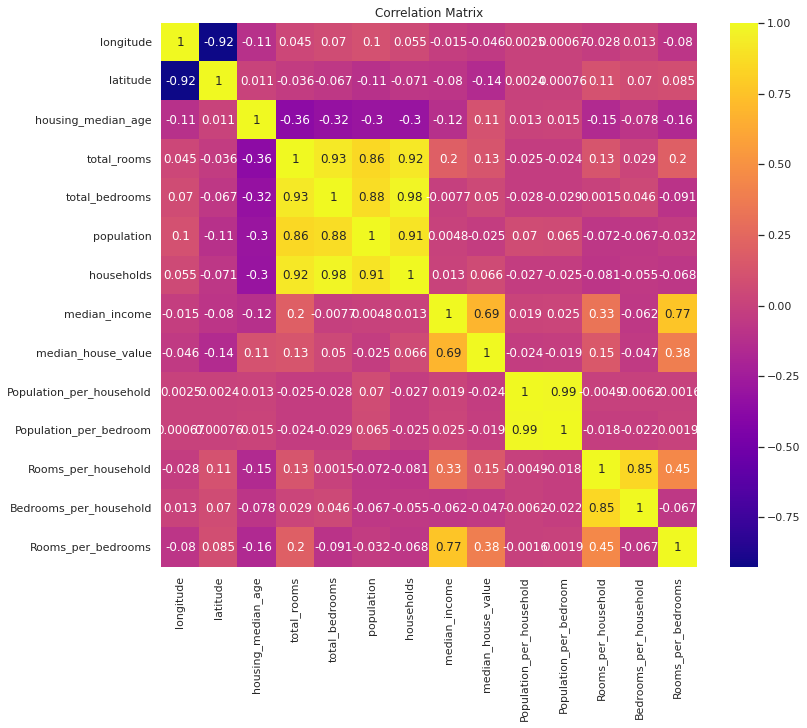

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,cmap='plasma')
plt.title("Correlation Matrix")

We see that population_per_household, population_per_bedroom and bedrooms_per_household have negligible correlation with our target.
Hence we will not add them as features in our pipeline.

#Stratified train-test split

In [ ]:
X = df_original.drop('median_house_value',axis=1)
y = df_original['median_house_value']

In [ ]:
df_clipped = df_original[df_original['median_house_value']<500000]
X_clipped = df_clipped.drop('median_house_value',axis=1)
y_clipped = df_clipped['median_house_value']
df_original["median_income_classified"] = pd.cut(df_original["median_income"],bins=[0., 2., 4., 6., 8., np.inf], labels=[1,2,3,4,5])
df_clipped["median_income_classified"] = pd.cut(df_clipped["median_income"],bins=[0., 2., 4., 6., 8., np.inf], labels=[1,2,3,4,5])

<ipython-input-16-d5bfd9f65777>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clipped["median_income_classified"] = pd.cut(df_clipped["median_income"],bins=[0., 2., 4., 6., 8., np.inf], labels=[1,2,3,4,5])


In [ ]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.2, stratify = df_original['median_income_classified'], random_state=42)
X_train_clipped, X_test_clipped, y_train_clipped, y_test_clipped = train_test_split(X_clipped, y_clipped, test_size = 0.2, stratify = df_clipped['median_income_classified'], random_state=42)

In [ ]:
df = df_original.copy()

#Creating a Pipeline for preprocessing

In [ ]:
features = np.array(X_train_original.columns)
num_features = features[features!='ocean_proximity']
cat_features = features[features=='ocean_proximity']

In [ ]:
rooms_index = df.columns.get_loc('total_rooms')
bedrooms_index = df.columns.get_loc('total_bedrooms')
house_index = df.columns.get_loc('households')
population_index = df.columns.get_loc('population')

class feature_eng(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    rooms_per_household = X[:,rooms_index]/X[:,house_index]
    bedrooms_per_room = X[:,bedrooms_index]/X[:,rooms_index]
    return np.c_[X,rooms_per_household,bedrooms_per_room]

In [ ]:
num_pipeline = Pipeline([('Imputer', SimpleImputer(strategy='median')),
                          ('Adding features', feature_eng()),
                          ('Standard Scaling', StandardScaler())])

cat_pipeline = Pipeline([('OHE', OneHotEncoder())])

pipeline = ColumnTransformer([('numerical',num_pipeline,num_features),
                              ('categorical',cat_pipeline,cat_features)])

X_train_prepared_original = pipeline.fit_transform(X_train_original)
X_test_prepared_original = pipeline.transform(X_test_original)

X_train_prepared_clipped = pipeline.fit_transform(X_train_clipped)
X_test_prepared_clipped = pipeline.transform(X_test_clipped)

#Elastic Net Regression with GridSearchCV for baseline model

In [ ]:
el_net_reg = ElasticNet()

param_grid = {
              'alpha': [0.01,0.1,1,10,100],
              'l1_ratio': [0.1,0.25,0.5,0.75,0.9]
              }

gridcv_enet = GridSearchCV(el_net_reg,param_grid,cv=5)
gridcv_enet.fit(X_train_prepared_original,y_train_original)
print(gridcv_enet.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.9}


In [ ]:
el_net = ElasticNet(alpha = 0.01, l1_ratio = 0.9)
el_net.fit(X_train_prepared_original,y_train_original)
y_test_pred = el_net.predict(X_test_prepared_original)
print('TEST RMSE: ',mean_squared_error(y_test_original,y_test_pred,squared=False))

70393.01458833796

Text(0.5, 1.0, 'PREDICTED VS TRUE HOUSE VALUE FOR ELASTIC-NET MODEL ON UNCLIPPED DATA')

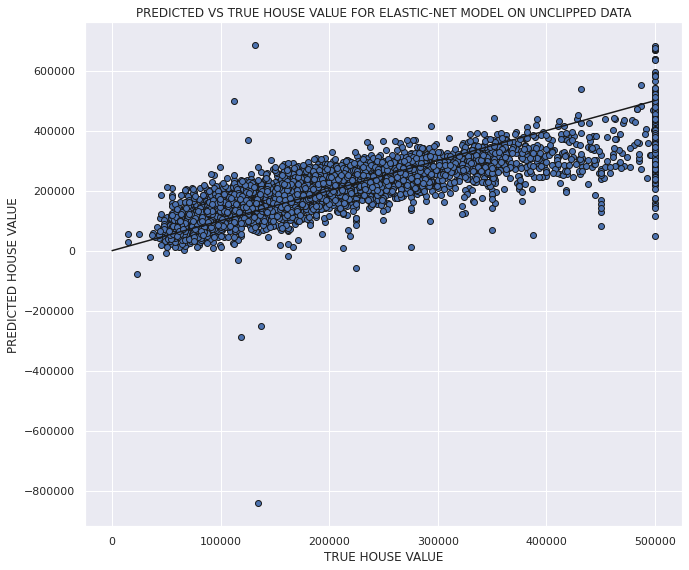

In [ ]:
plt.scatter(y_test_original, y_test_pred,edgecolors='k')
plt.plot([0,500000],[0,500000],color='k')
plt.xlabel('TRUE HOUSE VALUE')
plt.ylabel('PREDICTED HOUSE VALUE')
plt.title('PREDICTED VS TRUE HOUSE VALUE FOR ELASTIC-NET MODEL ON UNCLIPPED DATA')

As we can see that the datapoints where median house value is 500000 are adding a significant bias to the model which is leading to a poor RMSE value.

Let's try to train a model just for median house values less than 500000. This is a fair assumption as we don't even have the data for house values > 500000

In [ ]:
el_net_reg = ElasticNet()

param_grid = {
              'alpha': [0.01,0.1,1,10,100],
              'l1_ratio': [0.1,0.25,0.5,0.75,0.9]
              }

gridcv_enet = GridSearchCV(el_net_reg,param_grid,cv=5)
gridcv_enet.fit(X_train_prepared_clipped,y_train_clipped)
print(gridcv_enet.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.9}


In [ ]:
el_net = ElasticNet(alpha = 0.01, l1_ratio = 0.9)
el_net.fit(X_train_prepared_clipped,y_train_clipped)
y_test_pred = el_net.predict(X_test_prepared_clipped)
y_train_pred = el_net.predict(X_train_prepared_clipped)
print('TEST RMSE: ',mean_squared_error(y_test_clipped,y_test_pred,squared=False))
print('TRAIN RMSE: ',mean_squared_error(y_train_clipped,y_train_pred,squared=False))

TEST RMSE:  58722.17072859785
TRAIN RMSE:  60164.140480359405


Text(0.5, 1.0, 'PREDICTED VS TRUE HOUSE VALUE FOR ELASTIC-NET MODEL FOR CLIPPED DATA')

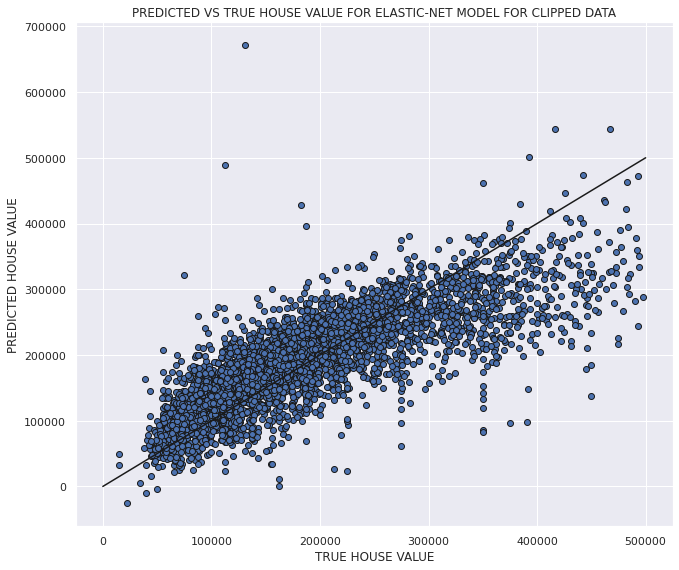

In [ ]:
plt.scatter(y_test_clipped, y_test_pred,edgecolors='k')
plt.plot([0,500000],[0,500000],color='k')
plt.xlabel('TRUE HOUSE VALUE')
plt.ylabel('PREDICTED HOUSE VALUE')
plt.title('PREDICTED VS TRUE HOUSE VALUE FOR ELASTIC-NET MODEL FOR CLIPPED DATA')

We can observe a signifcant increase in performance just by choosing to remove the noisy data, but still the absolute value of error is pretty high.

Hence we will proceed to train all our models on the clipped dataset itself.

This implies our model will only be applicable for areas where median_house_value < 500000

#Gradient Boosting Decision Trees using K-Fold Cross Validation

In [ ]:
X_train_prepared = X_train_prepared_clipped
y_train = y_train_clipped
X_test_prepared = X_test_prepared_clipped
y_test = y_test_clipped

##K-Fold Cross Validation for Gradient Boosted Trees of different depths

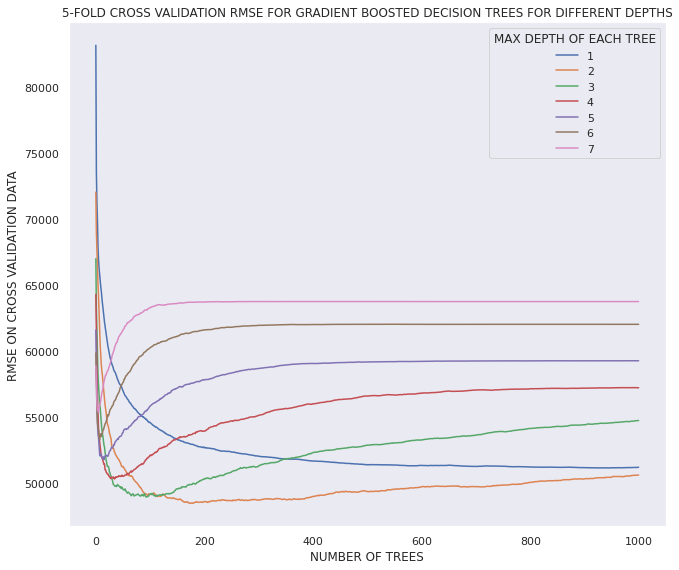

In [ ]:
min_error = 0
ideal_depth=0
ideal_num = 0
X_train_prepared_cut = X_train_prepared[:-3]
y_train_cut = y_train[:-3]
val_length = int((y_train_cut.shape[0])/5)
flag=0
for j in range(1,8):
  mse_val = np.zeros(shape=(1000))
  y = y_train_cut
  for k in range(5):
    prediction = np.zeros(val_length)
    X_cv_prepared = np.concatenate((X_train_prepared_cut[0:k*val_length],X_train_prepared_cut[(k+1)*val_length:]),axis=0)
    X_val_prepared = X_train_prepared_cut[k*val_length:(k+1)*val_length]
    y_cv = np.concatenate((y[0:k*val_length],y[(k+1)*val_length:]),axis=0)
    y_val = y[k*val_length:(k+1)*val_length]
    for i in range(1000):
      tree = DecisionTreeRegressor(max_depth=j,random_state=42)
      tree.fit(X_cv_prepared, y_cv)
      y_pred = tree.predict(X_val_prepared)
      y_train_pred = tree.predict(X_cv_prepared)
      prediction = prediction + y_pred
      mse_val[i] += (mean_squared_error(y_val,prediction,squared=False))
      y_cv = y_cv - y_train_pred
  mse_val = mse_val/5
  if(flag==0):
    min_error = np.amin(mse_val)
    ideal_num = np.argmin(mse_val) + 1
    ideal_depth = j
    flag=1
  if(np.amin(mse_val)<min_error):
    min_error = np.amin(mse_val)
    ideal_num = np.argmin(mse_val) + 1
    ideal_depth = j
  plt.plot(mse_val, label=j)
plt.legend(fancybox=True, title='MAX DEPTH OF EACH TREE')
plt.title('5-FOLD CROSS VALIDATION RMSE FOR GRADIENT BOOSTED DECISION TREES FOR DIFFERENT DEPTHS')
plt.xlabel('NUMBER OF TREES')
plt.ylabel('RMSE ON CROSS VALIDATION DATA')
plt.grid()

In [ ]:
print('Minimum Validation RMSE achieved: ',min_error)
print('Depth of tree: ', ideal_depth,', number of trees: ',ideal_num)

Minimum Validation RMSE achieved:  48435.31926378378
Depth of tree:  2 , number of trees:  174


##K-Fold Cross Validation for Gradient Boosted Trees (max_depth = 2) with different alpha values

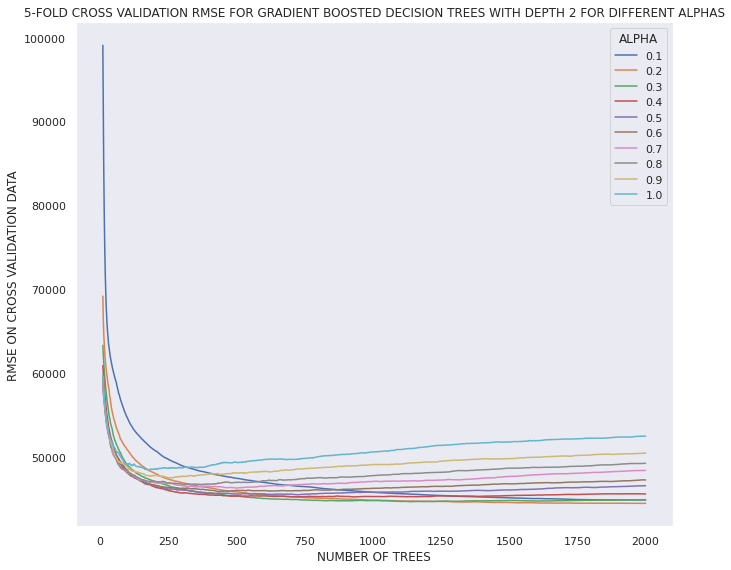

In [ ]:
min_error = np.zeros(shape=(10))
ideal_num = np.zeros(shape=(10))

X_train_prepared_cut = X_train_prepared[:-3]
y_train_cut = y_train[:-3]
val_length = int(y_train_cut.shape[0]/5)

for j in range(1,11):
  mse_val = np.zeros(shape=(2000))
  y = y_train_cut
  for k in range(5):
    prediction = np.zeros(val_length)
    X_cv_prepared = np.concatenate((X_train_prepared_cut[0:k*val_length],X_train_prepared_cut[(k+1)*val_length:]),axis=0)
    X_val_prepared = X_train_prepared_cut[k*val_length:(k+1)*val_length]
    y_cv = np.concatenate((y[0:k*val_length],y[(k+1)*val_length:]),axis=0)
    y_val = y[k*val_length:(k+1)*val_length]
    for i in range(2000):
      tree = DecisionTreeRegressor(max_depth=2,random_state=42)
      tree.fit(X_cv_prepared, y_cv)
      y_pred = tree.predict(X_val_prepared)
      y_train_pred = tree.predict(X_cv_prepared)
      prediction = prediction + (j/10)*y_pred
      mse_val[i] += (mean_squared_error(y_val,prediction,squared=False))
      y_cv = y_cv - (j/10)*y_train_pred
  mse_val = mse_val/5
  min_error[j-1] = np.amin(mse_val)
  ideal_num[j-1] = np.argmin(mse_val) + 1
  plt.plot(np.arange(10,2001,1,dtype=int),mse_val[9:],label=(j/10))
plt.legend(fancybox=True, title='ALPHA')
plt.title('5-FOLD CROSS VALIDATION RMSE FOR GRADIENT BOOSTED DECISION TREES WITH DEPTH 2 FOR DIFFERENT ALPHAS')
plt.xlabel('NUMBER OF TREES')
plt.ylabel('RMSE ON CROSS VALIDATION DATA')
plt.grid()

In [ ]:
for i in range(10):
  print('For ALPHA = ',((i+1)/10),', MIN RMSE: ',min_error[i],'& NUMBER OF TREES: ',ideal_num[i])

For ALPHA =  0.1 , MIN RMSE:  44854.74942742742 & NUMBER OF TREES:  1984.0
For ALPHA =  0.2 , MIN RMSE:  44451.23126540058 & NUMBER OF TREES:  1979.0
For ALPHA =  0.3 , MIN RMSE:  44652.25917573958 & NUMBER OF TREES:  1137.0
For ALPHA =  0.4 , MIN RMSE:  45216.793105946985 & NUMBER OF TREES:  929.0
For ALPHA =  0.5 , MIN RMSE:  45481.020225320644 & NUMBER OF TREES:  723.0
For ALPHA =  0.6 , MIN RMSE:  45855.60127740357 & NUMBER OF TREES:  433.0
For ALPHA =  0.7 , MIN RMSE:  46269.303361637416 & NUMBER OF TREES:  503.0
For ALPHA =  0.8 , MIN RMSE:  46690.70943826564 & NUMBER OF TREES:  333.0
For ALPHA =  0.9 , MIN RMSE:  47464.41804750721 & NUMBER OF TREES:  264.0
For ALPHA =  1.0 , MIN RMSE:  48435.31926378378 & NUMBER OF TREES:  174.0


##K-Fold Cross Validation for Gradient Boosted Trees (max_depth = 3) with different alpha values

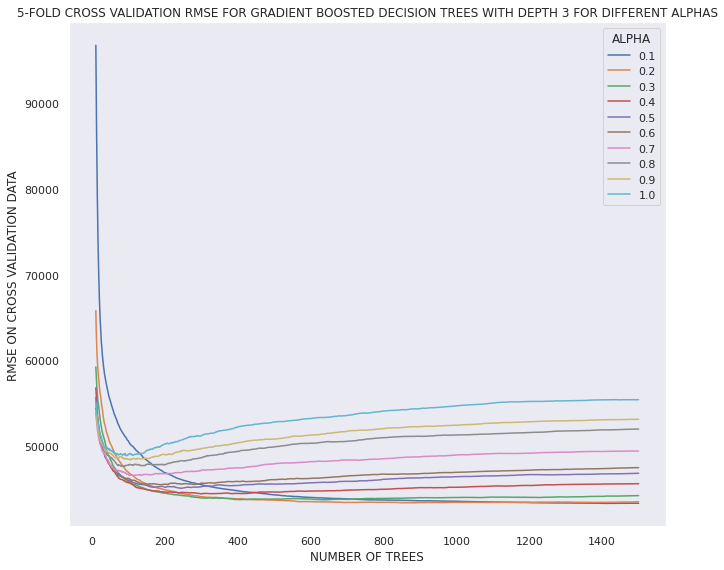

In [ ]:
min_error = np.zeros(shape=(10))
ideal_num = np.zeros(shape=(10))

X_train_prepared_cut = X_train_prepared[:-3]
y_train_cut = y_train[:-3]
val_length = int(y_train_cut.shape[0]/5)

for j in range(1,11):
  mse_val = np.zeros(shape=(1500))
  y = y_train_cut
  for k in range(5):
    prediction = np.zeros(val_length)
    X_cv_prepared = np.concatenate((X_train_prepared_cut[0:k*val_length],X_train_prepared_cut[(k+1)*val_length:]),axis=0)
    X_val_prepared = X_train_prepared_cut[k*val_length:(k+1)*val_length]
    y_cv = np.concatenate((y[0:k*val_length],y[(k+1)*val_length:]),axis=0)
    y_val = y[k*val_length:(k+1)*val_length]
    for i in range(1500):
      tree = DecisionTreeRegressor(max_depth=3, random_state=42)
      tree.fit(X_cv_prepared, y_cv)
      y_pred = tree.predict(X_val_prepared)
      y_train_pred = tree.predict(X_cv_prepared)
      prediction = prediction + (j/10)*y_pred
      mse_val[i] += (mean_squared_error(y_val,prediction,squared=False))
      y_cv = y_cv - (j/10)*y_train_pred
  mse_val = mse_val/5
  min_error[j-1] = np.amin(mse_val)
  ideal_num[j-1] = np.argmin(mse_val) + 1
  plt.plot(np.arange(10,1501,1,dtype=int),mse_val[9:],label=(j/10))
plt.legend(fancybox=True, title='ALPHA')
plt.title('5-FOLD CROSS VALIDATION RMSE FOR GRADIENT BOOSTED DECISION TREES WITH DEPTH 3 FOR DIFFERENT ALPHAS')
plt.xlabel('NUMBER OF TREES')
plt.ylabel('RMSE ON CROSS VALIDATION DATA')
plt.grid()

In [ ]:
for i in range(10):
  print('For ALPHA = ',((i+1)/10),', MIN RMSE: ',min_error[i],'& NUMBER OF TREES: ',ideal_num[i])

For ALPHA =  0.1 , MIN RMSE:  43352.59281147781 & NUMBER OF TREES:  1437.0
For ALPHA =  0.2 , MIN RMSE:  43417.879573892555 & NUMBER OF TREES:  849.0
For ALPHA =  0.3 , MIN RMSE:  43771.63163398782 & NUMBER OF TREES:  635.0
For ALPHA =  0.4 , MIN RMSE:  44459.31418656268 & NUMBER OF TREES:  300.0
For ALPHA =  0.5 , MIN RMSE:  45095.59998416589 & NUMBER OF TREES:  243.0
For ALPHA =  0.6 , MIN RMSE:  45535.2842545027 & NUMBER OF TREES:  189.0
For ALPHA =  0.7 , MIN RMSE:  46569.2780644631 & NUMBER OF TREES:  113.0
For ALPHA =  0.8 , MIN RMSE:  47663.80815236889 & NUMBER OF TREES:  85.0
For ALPHA =  0.9 , MIN RMSE:  48394.9321963717 & NUMBER OF TREES:  105.0
For ALPHA =  1.0 , MIN RMSE:  48918.19538892857 & NUMBER OF TREES:  94.0


We can see that for gradient boosting trees with depth 3, we achieve better validation RMSE for lesser number of trees than for depth 2 as expected. There is not much difference in the best performance of the two, hence we use depth 3 trees in order to make inference/prediction faster.

There is a trade-off between the RMSE and number of trees which is inversely proportional to alpha.

We choose number of trees to be 243 for alpha = 0.5 as it provides a good enough RMSE for a reasonable number of trees.

#Final Model

In [ ]:
gradient_boosted_model = []
y = y_train
alpha = 0.5
for i in range(243):
  tree = DecisionTreeRegressor(max_depth = 3,random_state=42)
  tree.fit(X_train_prepared, y)
  y_train_pred = tree.predict(X_train_prepared)
  y = y - alpha*y_train_pred
  gradient_boosted_model.append(tree)

In [ ]:
pred = np.zeros(y_test.shape)
for tree in gradient_boosted_model:
  pred += alpha*tree.predict(X_test_prepared)
print('TEST RMSE: ',mean_squared_error(y_test,pred,squared=None))

43753.20239817383


Text(0.5, 1.0, 'PREDICTED VS TRUE HOUSE VALUE FOR GRADIENT BOOSTED TREES MODEL')

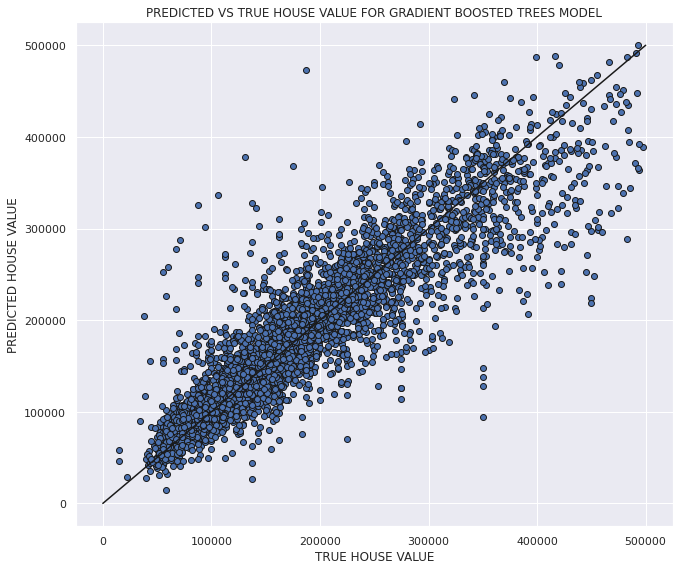

In [ ]:
plt.scatter(y_test,pred,edgecolors='k')
plt.plot([0,500000],[0,500000],color='k')
plt.xlabel('TRUE HOUSE VALUE')
plt.ylabel('PREDICTED HOUSE VALUE')
plt.title('PREDICTED VS TRUE HOUSE VALUE FOR GRADIENT BOOSTED TREES MODEL')

As we can see from the above scatterplot, the model is making acceptable predictions for most datapoints barring a few outliers.


#Conclusion


*   The median income is a very important feature for the prediction of median house value

*   The baseline model i.e. the ElasticNet model underfit the data as both the train and test error were pretty high
*   The model performed better if the dataset used was clipped, i.e. was only trained and tested on datapoints whose median house values < 500000.

*   In the Gradient Boosted Decision Tree model, there exists a tradeoff between the number of trees required(different alphas) and the minimum RMSE achieved.
*   The model needs to be finalised after taking into consideration the additional time it would require for prediction for a model having a large number of trees.